# US SuperStores Data

We are given the data for 45 different stores in United states in three different categories. For anonymity reasons unfortunately the name and the location of these stores are not provided.
* `Stores` : This table carries the information of 45 different stores, its type and sizes.
* `Features` : Contains the more informed data of different attributes around the store, local data and data around the dates.
* `Sales` : Sales data of the store on weekly basis.

We will be focusing on how weekly sales varies for different departments and which all attributes contributes towards the sales.

One thing to be noted here is that the date provided to us marks the beginning a the week.

Let's import all the necessary libraries here to begin with data cleaning and data exploration for now.

In [66]:
# Imorting neccesary libraries for data cleaning and data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

#### Importing data

Since 3 different data sets are provided we will load all 3 in different dataframes

In [67]:
# Creating 3 different dataframes for each table
df_stores = pd.read_csv('data/stores.csv')
df_features = pd.read_csv('data/features.csv')
df_sales = pd.read_csv('data/sales.csv')

Next we need to figure out the relationship between these 3 different tables and for that lets have an overview of all of these dataframes.

## Overview

###### Lets have a bird view over our 3 datasets

In [68]:
#shape of each table
print(f'df_stores have {df_stores.shape[0]} rows and {df_stores.shape[1]} columns')
print(f'df_features have {df_features.shape[0]} rows and {df_features.shape[1]} columns')
print(f'df_sales have {df_sales.shape[0]} rows and {df_sales.shape[1]} columns')

df_stores have 45 rows and 3 columns
df_features have 8190 rows and 12 columns
df_sales have 421570 rows and 5 columns


From above overview what we could make is that:
* `df_stores` dataframe contains data for 45 different stores one in each row.

Lets explore furhter for other tables.

In [69]:
# Overviewing stores table
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


We are provided with the data of 45 stores each categorized among three different types. Each store has a different size.

In [70]:
# Overviewing features table
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In `features` table we are given regional data around the store such as Temperature, Fuel_Price, CPI(Consumer Price Index), Unemployement rate and weather it was a holiday or not. Let try to understand a bit more about `features` table.
Next I plan to explore the date column on how it is displaying the data.

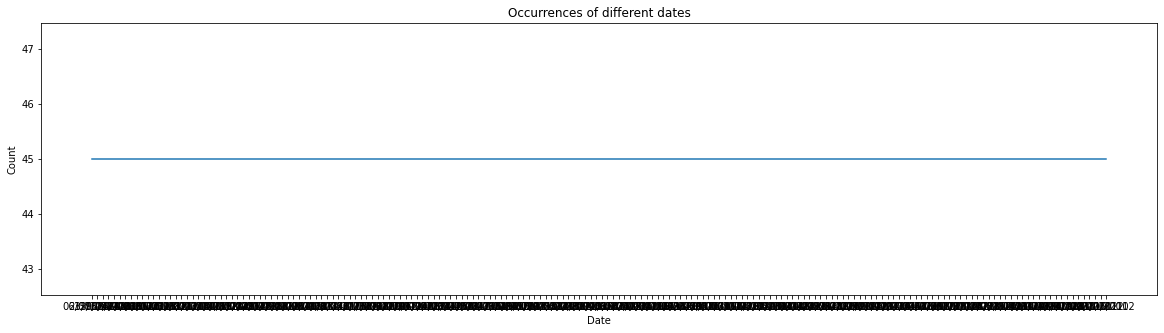

In [71]:
# Counting the instances of Dates occuring each time.
plt.figure(figsize = (20,5))
plt.plot(df_features['Date'].value_counts())
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Occurrences of different dates')
plt.savefig('Occurrences of dates.png')
plt.show()


In the above visualization the X-axis denotes the unique values of dates. Being high in number the x-axis looks messy, but our focus is y-axis that is the count of each date occurrence.

Here we can see each date is occurring 45 times which means data here provided is for 45 different different stores and it shows all different features for all 45 different stores on each instance of `Date` or we can say each week.

In [72]:
# Overviewing sales table
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [73]:
count_dept = df_sales['Dept'].nunique()
print(f' There are {count_dept} departments in total.')

 There are 81 departments in total.


Here in the `sales` table we are provided with weekly sales of each department in each store and weather that week had one or more holiday or not.

#### New Dataframe with all attributes

We can merge the three tables 
* 1st Merge: Merging **df_tables** and **df_features** on 3 columns `Store`, `Date`, `IsHoliday`
* 2nd Merge: Merging above resultant dataframe with **df_stores** table on `Store` column.

In [74]:
# Merging all three tables
df=pd.merge(df_sales,df_features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,df_stores, on=['Store'], how='left')

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


We now have our one single dataframe `df` to move ahead with data cleaning and Exploratory data analysis.


In [75]:
# Lets check for total rows and columns
print(f'Dataframe have {df.shape[0]} rows and {df.shape[1]} columns') 

Dataframe have 421570 rows and 16 columns


## Data Cleaning and EDA

In [76]:
# Datatypes of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


We can convert the following columns
* `Date`: from object to Datetime64 
* `IsHoliday`: from boolean to binary(int) by assigning True as 1 and False as 0

In [77]:
# Assigning Data types
df['Date'] = pd.to_datetime(df['Date'])

# Binarizing column with boolean values
df["IsHoliday"] = df["IsHoliday"].replace({True: 1, False: 0})


In [78]:
# check for duplicates
print(f'Dataframe have {df.duplicated().sum()} duplicate rows')

Dataframe have 0 duplicate rows


In [79]:
# check for null values

df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

As we can see only 5 different MarkDowns column have null values, we can tell that in missing values of `Markdown` columns that particular week didn't have any markdowns so we can replace all the null values with 0.

In [80]:
# Filling in null values in Markdown columns with 0
df = df.fillna(0)

Lets create month, year, week and month-year columns to look for some detailed time series analysis.

In [81]:
# Adding Month and week number to a new column from date column

df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.weekofyear

<ipython-input-81-859f2665753f>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.weekofyear


##### Lets have a list of columns to differentiate between category columns and numerical columns

In [82]:
print(df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Month', 'Week'],
      dtype='object')


In [83]:
# List of category column
cat_col = ['Store', 'Dept', 'IsHoliday', 'Type', 'Month', 'Week', 'Size']

# List of numerical columns
num_col = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

Distribution of Store


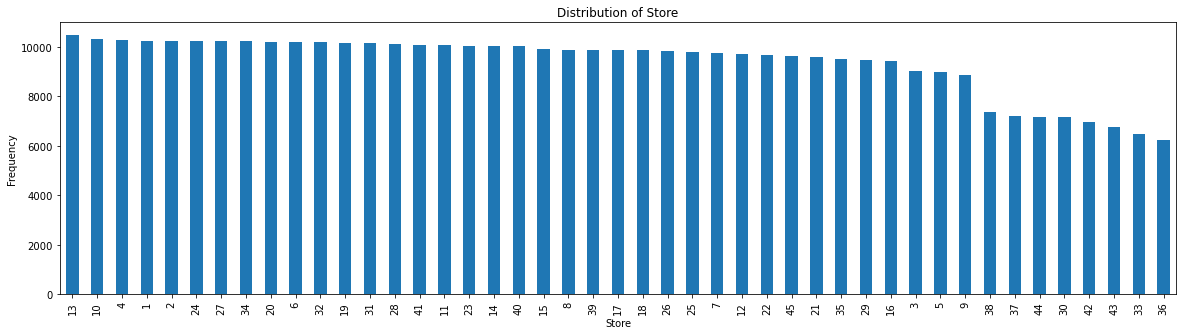



Distribution of Dept


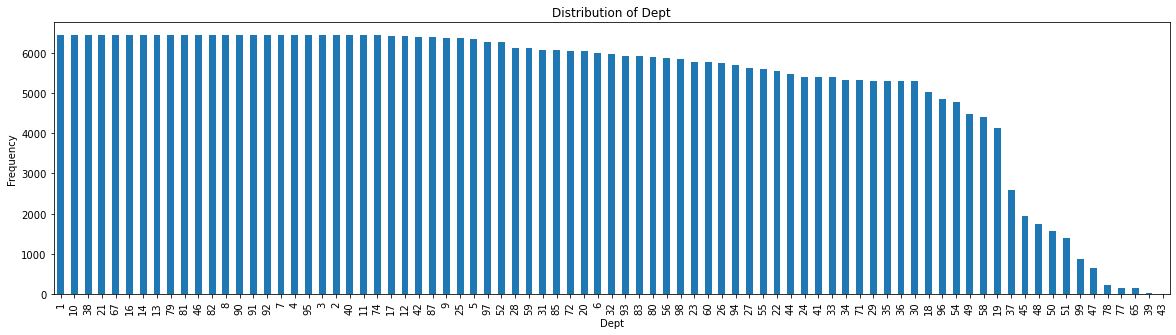



Distribution of IsHoliday


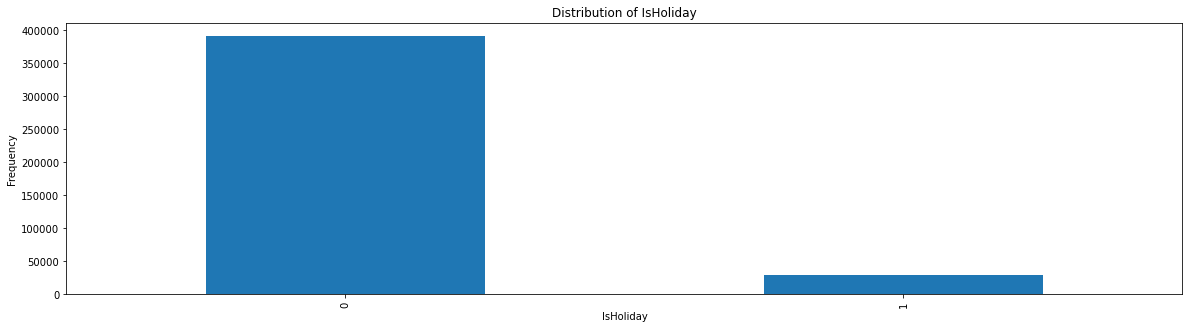



Distribution of Type


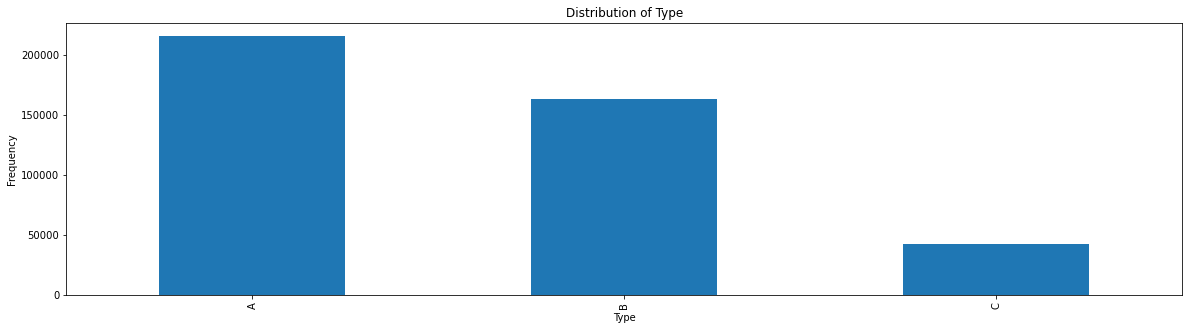



Distribution of Month


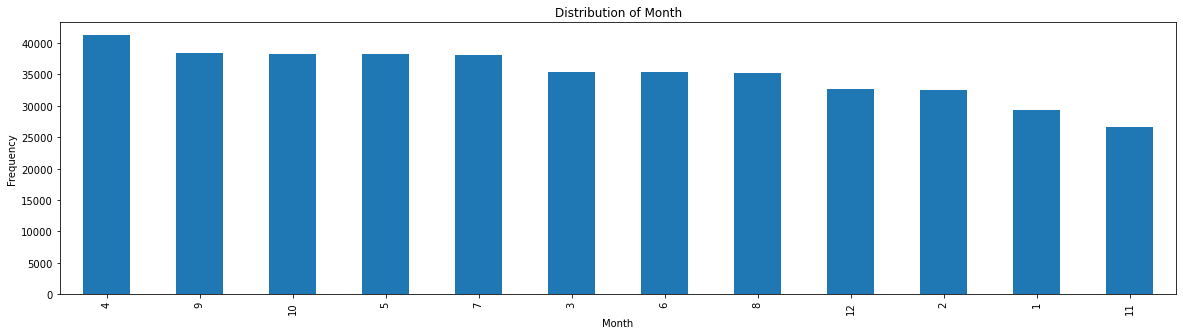



Distribution of Week


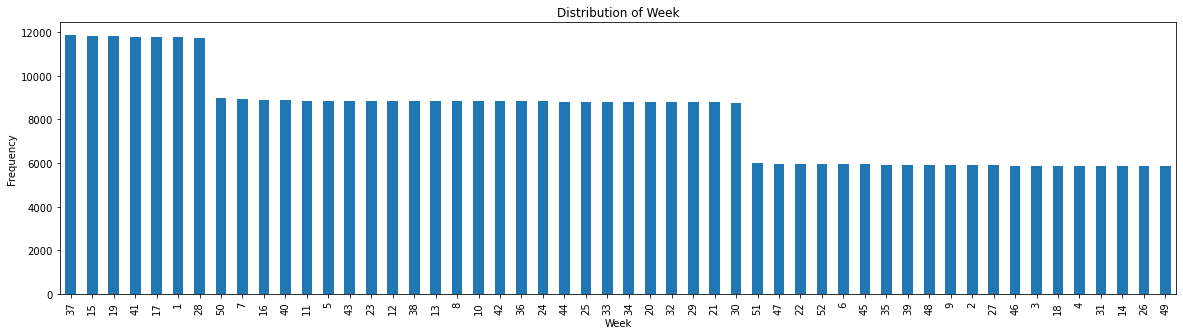



Distribution of Size


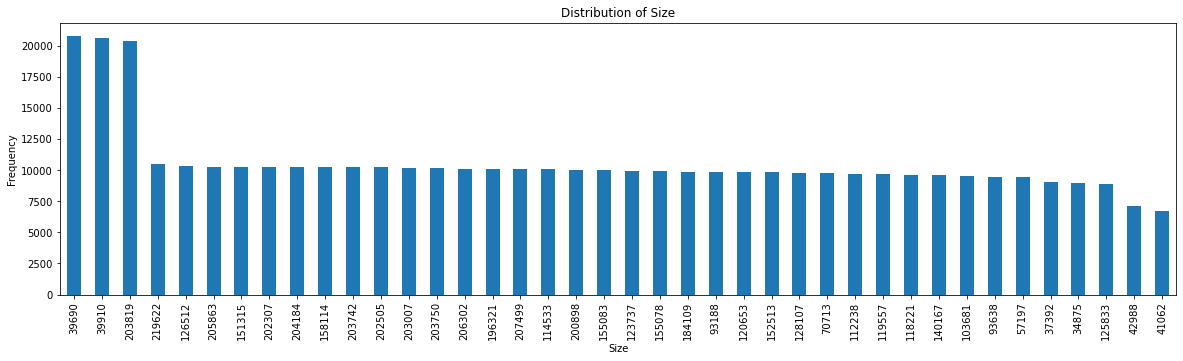

In [84]:
# Plotting categorical columns to understand distribution


for col in cat_col:
    print(f'Distribution of {col}')
    plt.figure(figsize= (20,5))
    df[col].value_counts().plot(kind = "bar")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f'Distribution of {col}')
    plt.savefig(f'Frequency of {col}.png')
    plt.show()
    print('\n')

**Analyzing plots of categorical columns above:**
* `Store`: Most of the stores have almost same number of sales data for each week.
* `Department` : Looking at the plot we can tell that while more than 75% of the stores have all the departments but there are few departments which are very less in number which says that not every store has every department.
* `Type` : Most of the sales contributed are from the stores belonging to type A and the least are contributed from the type C stores.

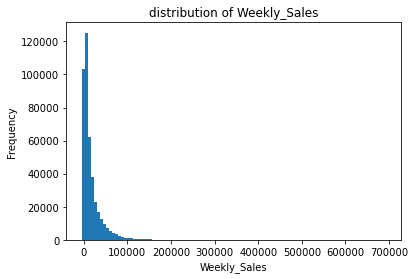

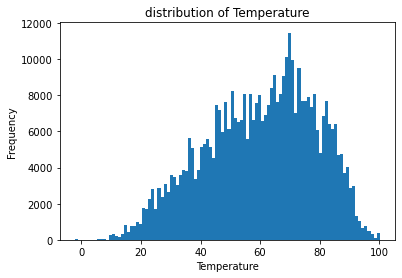

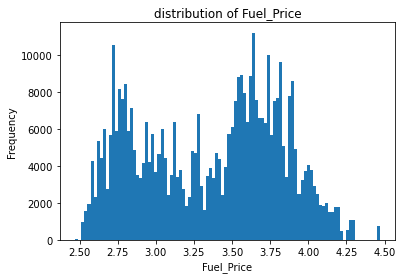

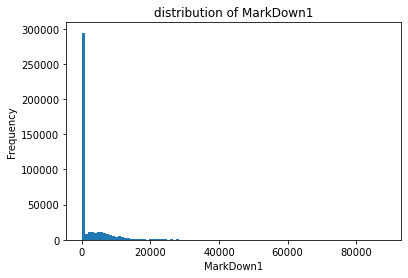

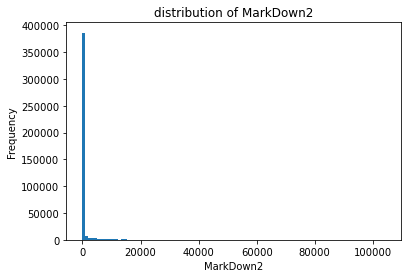

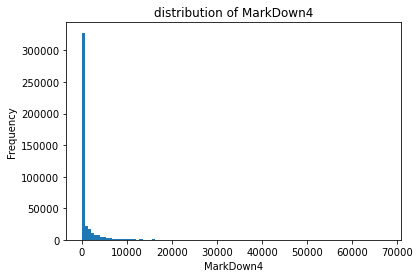

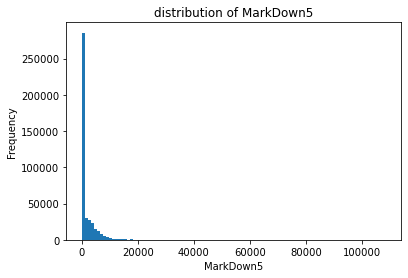

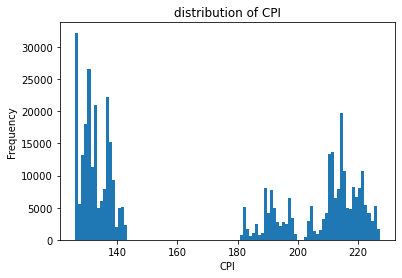

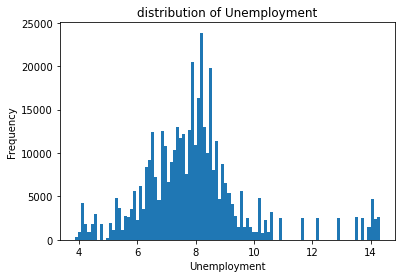

In [85]:
# Plotting numerical columns to understand distribution
for col in num_col:
    plt.figure
    df[col].plot(kind = 'hist', bins = 100)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'distribution of {col}')
    plt.savefig(f'Frequency of {col}.png')
    plt.show()

**Analyzing distribution of numerical columns:**
* `Weekly_Sales`: The weekly sales column is totally right skewed, We can drop the rows with sales more than 60,000 to bring some normality.
* `Temperature`: Temperature column looks normally distributed.
* `Fuel_Price`: This column have some irregularities but we can look and say it is normally distributed.
* `MarkDown 1 - 5`: These 5 columns seems to be highly skewed towards right so we would intead binarize the column for any markdown as 1 and no markdown as 0 and merge all the markdowns.
* `CPI`: This column is not at all well distributed so we will choose to drop it.
* `Unemployment`: This column looks very well distributed.

Lets drop all the rows in which `Weekly_Sales` are greater than 100,000.

In [86]:
df.drop(df[df['Weekly_Sales'] > 60000].index, inplace=True)

We will now merge and binarize all the Markdown columns.

In [87]:
# Merging Markdown columns

df['Markdown'] = df['MarkDown1'] + df['MarkDown2'] + df['MarkDown3'] + df['MarkDown4'] + df['MarkDown5']

# Binarizing the new Markdown column
df['Markdown'] = np.where(df['Markdown'] > 0, 1, 0)

We will drop the columns which are not needed anymore
* `CPI`
* `MarkDown 1-5`

In [88]:
# Dropping the columns not needed.

df.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI'], inplace = True)

**Lets check the correlation between all the columns**

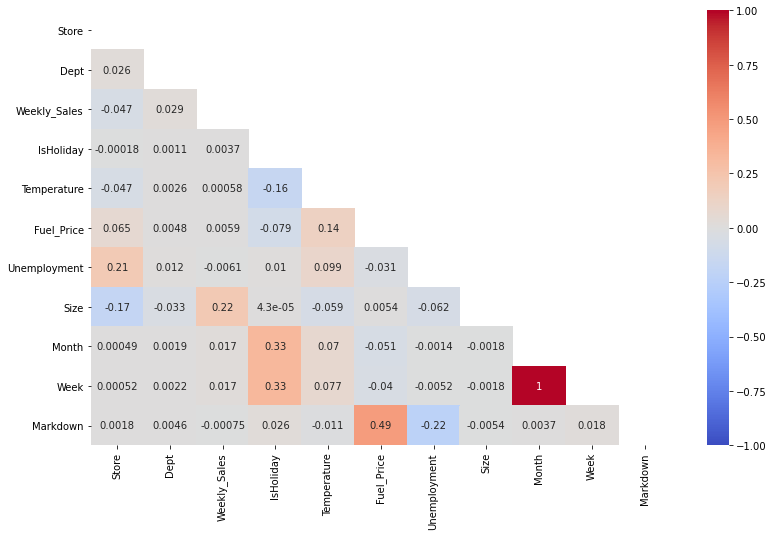

In [89]:
# Checking correlation between columns
plt.figure(figsize=(13,8))
matrix = np.triu(df.corr())
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,  cmap='coolwarm', mask=matrix, vmin = -1, vmax = 1, annot = True)
plt.savefig('Correlation.png')
plt.show()

Here we can see correlation between some columns which is somewhat significant for example correlation between `Fuel_Price` and `Markdown`, `Store` and `Unemployment` , `Weekly_Sales` and `Size`.

## Advanced EDA
### Time series analysis

<Figure size 432x288 with 0 Axes>

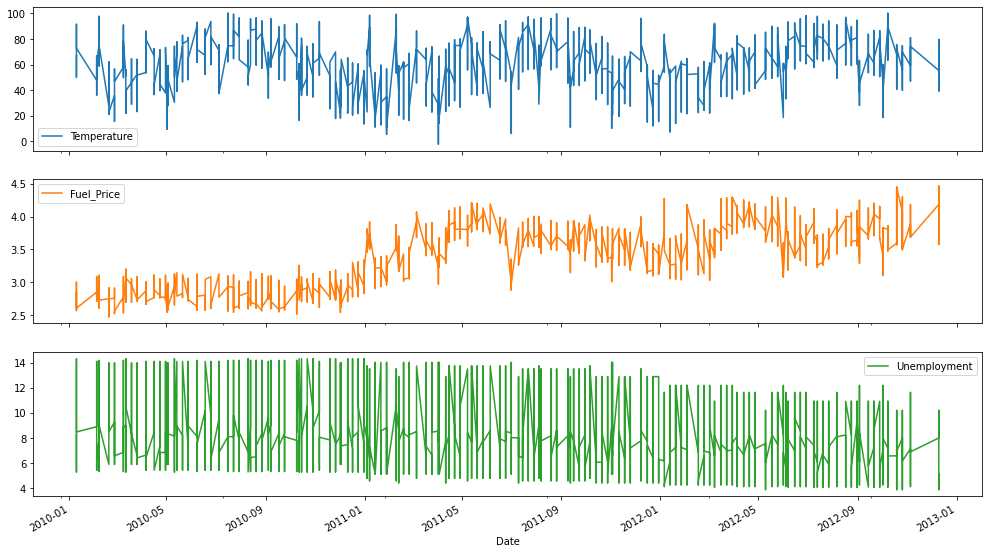

In [90]:
# Time series analysis of Temperature, Fuel Price and Unemployment rate.
plt.figure()
df[['Date', 'Temperature', 'Fuel_Price', 'Unemployment']].plot(x='Date', subplots=True, figsize = (17,10))
plt.savefig('Time series(Fuel, Temp, Unemp.png')
plt.show()

In above visualization we can tell basic the trend of fuel prices going up over the time, unemployment rate reducing over the time and tempurature changing over the months as per the season.

Lets create a plot to look at weekly sales volume over the time given.

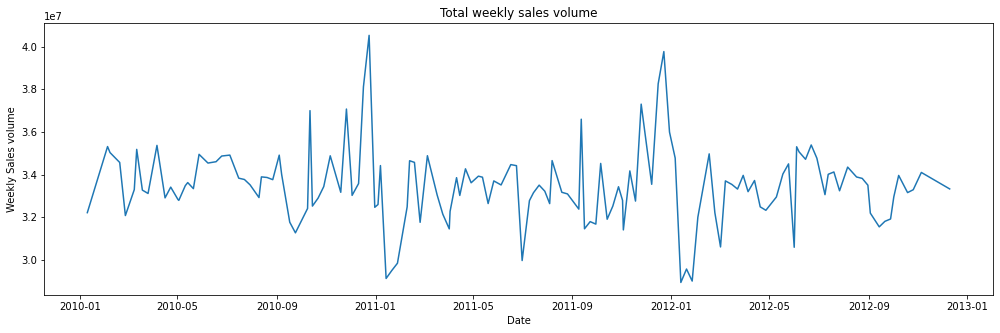

In [91]:
# Grouping all weekly sales over the date
df_sales = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

# To visualize weekly slaes vloume over the time
plt.figure(figsize=(17,5))
plt.plot(df_sales.Date, df_sales.Weekly_Sales)
plt.title('Total weekly sales volume')
plt.xlabel('Date')
plt.ylabel('Weekly Sales volume')
plt.savefig('Time series for sales.png')
plt.show()

Here the plot shows that the weekly sales spikes up ath the end of every year that we can tell is holiday season. Beginning of every year shows the least volume of sales which is quite evident after the end of the Holiday Season. 

**We can tell that Month of December is the month for every store to focus on their Markdown offers.**

### Weekly sales over different attributes

##### Total sales volume over different type of stores

Type
A    2.771099e+09
B    1.685205e+09
C    3.307688e+08
Name: Weekly_Sales, dtype: float64


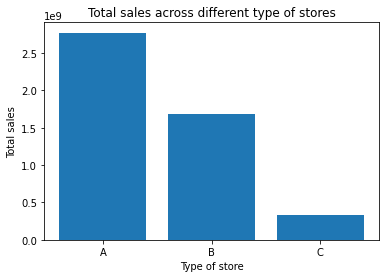

In [92]:
# Weekly sales for different Types of store
type_sales = df.groupby('Type')['Weekly_Sales'].sum()
print(type_sales)
plt.figure()
plt.bar(type_sales.index, type_sales.values)
plt.xlabel('Type of store')
plt.ylabel('Total sales')
plt.title('Total sales across different type of stores')
plt.savefig('Total sales to different types.png')
plt.show()


Among three different types of stores 
* `A type` - 2.77 Billion Dollars
* `B type` - 1.68 Billion Dollars
* `C type` - 0.33 Billion Dollars

##### Total sales volume over different departments

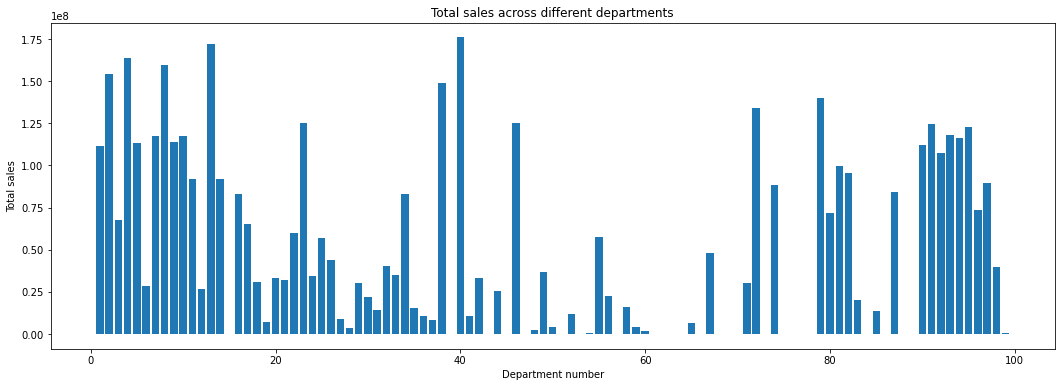

In [93]:
# Weekly sales for different Dept of stores
dept_sales = df.groupby('Dept')['Weekly_Sales'].sum()
plt.figure(figsize = (18,6))
plt.bar(dept_sales.index, dept_sales.values)
plt.xlabel('Department number')
plt.ylabel('Total sales')
plt.title('Total sales across different departments')
plt.savefig('Total sales to departments.png')
plt.show()

Sales are not very well distributed over different departments, maybe for the reason that not every store have every departments. 

##### Total sales volume over different stores.

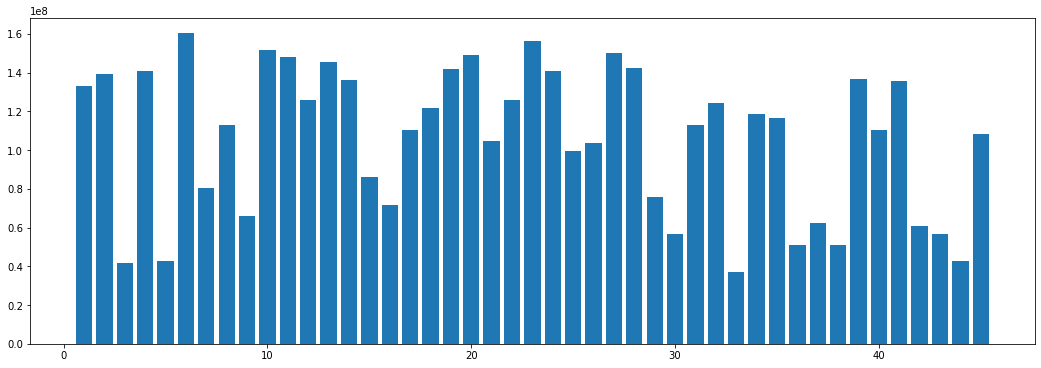

In [94]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum()
plt.figure(figsize = (18,6))
plt.bar(store_sales.index, store_sales.values)
plt.savefig('Weekly Sales in each store.png')
plt.show()

Looking at above plot we can tell sales over different stores varies wiht no regular pattern since we couldn't identify which store is located where.

##### Violin plot to overview weekly sales over different types

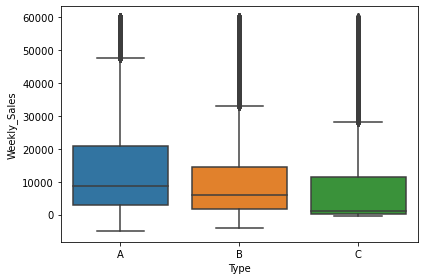

In [96]:
plt.figure()
sns.boxplot(data = df, x = 'Type', y = 'Weekly_Sales')
plt.tight_layout()
plt.savefig('Weekly sales to type.png')
plt.show()

We can see that most of the stores in all three different types have sales of not more than 20,000 dollars while there are alot outliers for haveing sales more than 20,000 even though we have removed all the rows with sales having more than 60,000

### Linear Regression

##### Lets do One Hot Encoding for columns necessary


We will perform one hot encoding over the following columns and drop the orignal column after creating dummy variables in the orignal data frame.
* `Type`: 3 columns
* `Store`: 45 columns
* `Dept`: 81 columns
* `Week`: 52 columns
* `Month`: 12 columns

In [52]:
# Creating dummy variables for Type column and renaming the columns
temp_df = pd.get_dummies(df["Type"])
temp_df = temp_df.rename(columns={"A": "TypeA", "B": "TypeB", "C": "TypeC"})

# Concatinating the columns to orignal dataframe and droping the orignal Type column
df = pd.concat([df, temp_df], axis = 1)
df.drop("Type", axis = 1, inplace = True)

# Creating dummy variables for Store column and renaming the columns
temp_df = pd.get_dummies(df["Store"])
temp_df = temp_df.rename(columns=lambda x: 'Store' + str(x))

# Concatinating the columns to orignal dataframe and droping the orignal Type column
df = pd.concat([df, temp_df], axis = 1)
df.drop("Store", axis = 1, inplace = True)

# Creating dummy variables for Dept column and renaming the columns
temp_df = pd.get_dummies(df["Dept"])
temp_df = temp_df.rename(columns=lambda x: 'Dept' + str(x))

# Concatinating the columns to orignal dataframe and droping the orignal Type column
df = pd.concat([df, temp_df], axis = 1)
df.drop("Dept", axis = 1, inplace = True)

# Creating dummy variables for Week column and renaming the columns
temp_df = pd.get_dummies(df["Week"])
temp_df = temp_df.rename(columns=lambda x: 'Week' + str(x))

# Concatinating the columns to orignal dataframe and droping the orignal Type column
df = pd.concat([df, temp_df], axis = 1)
df.drop("Week", axis = 1, inplace = True)

# Creating dummy variables for Month column and renaming the columns
temp_df = pd.get_dummies(df["Month"])
temp_df = temp_df.rename(columns=lambda x: 'Month' + str(x))

# Concatinating the columns to orignal dataframe and droping the orignal Type column
df = pd.concat([df, temp_df], axis = 1)
df.drop("Month", axis = 1, inplace = True)

In [53]:
# Checking the shape of our new dataframe after OH Encoding
df.shape

(399510, 201)

In [54]:
X = df.drop(columns = ['Weekly_Sales', 'Date',], axis=1) # Assigning independent variables to X
y = df['Weekly_Sales'] # Dependent Variable

In [55]:
X_withconstant = sm.add_constant(X)

In [56]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()


In [57]:
myregression_results.summary() # Summarizing the result of regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     4279.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:22:26   Log-Likelihood:            -4.1504e+06
No. Observations:              399510   AIC:                         8.301e+06
Df Residuals:                  399325   BIC:                         8.303e+06
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          591.1777    202.146      2.925      0.003     194.978     987.378
IsHoliday     -106.3507     83.863     -1.268      0.205    -270.719      58.018
Temperature      0.2765      1.372      0.202      0.840      -2.413       2.966
Fuel_Price    -162.6184     40.123     -4.053      0.000    -241.258     -83.979
Unemployment   -98.8832     30.278     -3.266      0.001    -158.227     -39.539
Size             0.0902      0.000    205.582      0.000       0.089       0.091
Markdown        42.8683     40.429      1.060      0.289     -36.372     122.109
TypeA        -1206.5805     48.762    -24.744      0.000   -1302.153   -1111.007
TypeB         1021.7117     65.549     15.587      0.000     893.238    1150.185
TypeC          776.0465    104.335      7.438      0.000     571.553     980.540
Store1        3765.4519     80.711     46.653      0.000    3607.260    3923.644
Store2        1708.1329     83.583     20.436      0.000    1544.314    1871.952
Store3        -432.3845     81.437     -5.309      0.000    -591.999    -272.770
Store4        2546.3181    104.869     24.281      0.000    2340.777    2751.859
Store5        -669.5703     84.511     -7.923      0.000    -835.209    -503.931
Store6        1353.4273     91.217     14.838      0.000    1174.646    1532.209
Store7         -13.0618     85.802     -0.152      0.879    -181.231     155.108
Store8       -1198.8699     90.420    -13.259      0.000   -1376.091   -1021.649
Store9       -5710.4483    102.698    -55.604      0.000   -5911.733   -5509.163
Store10       7107.8283     83.532     85.091      0.000    6944.108    7271.549
Store11       -964.1343     85.315    -11.301      0.000   -1131.349    -796.920
Store12       2396.1960    179.840     13.324      0.000    2043.714    2748.678
Store13        601.8527     88.747      6.782      0.000     427.910     775.795
Store14       2228.7193     85.438     26.086      0.000    2061.263    2396.175
Store15      -4084.7196     77.541    -52.678      0.000   -4236.698   -3932.741
Store16        328.8154     84.699      3.882      0.000     162.808     494.823
Store17       2008.7381     87.675     22.911      0.000    1836.899    2180.578
Store18       1721.0737     82.863     20.770      0.000    1558.665    1883.482
Store19       -768.7073     80.237     -9.580      0.000    -925.970    -611.444
Store20       3338.1590     84.603     39.457      0.000    3172.340    3503.978
Store21      -3589.9159     81.948    -43.807      0.000   -3750.531   -3429.301
Store22       1522.7573     78.704     19.348      0.000    1368.499    1677.015
Store23       5453.5488    124.067     43.957      0.000    5210.382    5696.716
Store24      -1489.8072     80.346    -18.542      0.000   -1647.282   -1332.332
Store25      -3141.4519     80.281    -39.131      0.000   -3298.800   -2984.104
Store

#### Conclusion

Many of the attributes shown here doesn't show much contribution towards the `Weekly Sales` for example `Temperature`, `Markdown`, some of the departments and weeks.

While the R^2 of our model is 0.66 we can say that the model have some significance so lets perform Lasso and Ridge regression over it.


Before moving forward with building models we will create test data set to check the perfomance of our model

### Splitting the train test set

In [58]:
from sklearn.model_selection import train_test_split #importing train test split module

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # Creating train test split by 80/20

### Scaling the data

In [59]:
from sklearn.preprocessing import StandardScaler
my_ss = StandardScaler() # Instantiating the standard scalar
my_ss.fit(X_train) # Ftting the scalar
X_train_s = my_ss.transform(X_train)
X_test_s = my_ss.transform(X_test)

## Lasso and Ridge Regression

In [60]:
# Imports
from sklearn.linear_model import Lasso, Ridge

# Instantiate
mylasso = Lasso()
myridge = Ridge()

# Fit models
mylasso.fit(X_train_s, y_train)
myridge.fit(X_train_s ,y_train)

C:\Users\Mayank\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174275590991.61914, tolerance: 5875723122.864016
  model = cd_fast.enet_coordinate_descent(


Ridge()

In [61]:
#Checking for coefficient on Lasso regression 
mylasso.coef_

array([-2.33853947e+00,  1.08902099e+01, -6.20507247e+01, -1.71617433e+02,
        4.28401582e+03,  1.44172308e+01, -0.00000000e+00,  6.21164984e+01,
       -0.00000000e+00,  5.23094566e+02,  3.64710604e+02, -1.34153500e+02,
        4.88055466e+02, -1.57607101e+02,  3.27211227e+02,  3.13681797e+01,
       -2.10813187e+02, -6.29549594e+02,  1.26851022e+03, -1.23127198e+01,
        5.24771681e+02,  2.55104398e+02,  4.35846737e+02, -4.30519753e+02,
        4.59230187e+01,  4.10214182e+02,  4.53417584e+02,  5.86282252e+00,
        6.00998672e+02, -2.87878840e+02,  4.20564403e+02,  9.87202833e+02,
       -1.03442474e+02, -2.70768244e+02, -1.97360487e+02,  3.13871712e+02,
       -8.68864093e+01, -2.39796646e+02, -1.03808408e+02, -3.39546628e+02,
       -3.92633728e+02, -4.96152584e+02, -2.14644316e+02,  3.70035128e+02,
       -2.41070247e+02,  7.28783003e+01, -1.38282713e+02,  1.54461632e+02,
       -2.46963947e+02, -1.76107606e+02,  1.44485046e+02,  1.49985419e+02,
       -4.17740281e+02,  

In [62]:
# Checking for coefficient on Ridge regression
myridge.coef_

array([-6.12287967e+00,  7.58703961e+00, -6.33016512e+01, -1.90545085e+02,
        1.85879403e+03,  1.23160520e+01,  5.94377535e+02, -1.67553084e+02,
       -7.04408667e+02,  4.03600328e+02,  5.46077927e+02, -6.79410015e+02,
        6.83929976e+02, -7.21386698e+02,  5.13587410e+02, -3.32060660e+02,
       -3.14590839e+02, -6.56102713e+02,  1.25149537e+03,  2.03597513e+02,
        4.27490615e+02,  5.39237753e+02,  6.07918269e+02, -4.68884937e+02,
       -3.94729403e+02,  1.85777528e+02,  4.00819180e+02,  2.02031525e+02,
        7.88298280e+02, -2.26113444e+02,  3.59879819e+02,  8.90982899e+02,
        9.39192480e+01, -2.83191254e+02, -3.13279864e+02,  5.09045079e+02,
        1.33118029e+02, -4.57679556e+02, -3.17470158e+02, -1.48220187e+02,
       -1.99527873e+02, -1.15982511e+03, -2.95124164e+02,  2.14957899e+02,
       -8.87710760e+02, -1.55189932e+02, -3.67066461e+02,  2.30339147e+02,
       -3.53415621e+02, -2.81279039e+01, -7.83187236e+01, -5.77548766e+01,
       -6.51408439e+02, -

In [63]:
# Lasso regression accuracy

mylasso.score(X_test_s, y_test)

0.6576840308545275

In [64]:
# Ridge Regression accuracy

myridge.score(X_test_s, y_test)

0.6576798146302516

We can tell from above that there is only 65% accuracy in predicting the `weekly sales` given the different attributes. While not all attributes are contributing positively towards the weekly sales as seen in the array of coefficients of both Lasso and Ridge regression. 